# Feeture Engineering

## 1 Como Diseñar buenas features y la maldición de la dimensionalidad

<div class='alert alert-success'>
Mejorar la performance del modelo, no es solo optimizar sus parametros. 
Una de las partes clave, es la de **diseñar la representación en la que se entregan los datos a los modelos** para que estos los procesen. 
Esto equivale, en palabras más simples, en definir de forma inteligente las features (columnas) de nuestras tablas de datos.

Supongamos que estamos tratando de resolver el problema siguiente.

Tenemos que reconocer si ciertos datos con una sola feature son de una clase 1 o de una clase 2 (por ejemplo "el producto esta deficiente" o "el producto esta funcional").

Por lo tanto estamos resolviendo una clasificación. Para esta clasificación decidimos tomar un SVM, que es un modelo poderoso que funciona buscando la "mejor" recta que separa los puntos de cada clase.

<img src='img/one_feature.png' />
> Si el modelo SVM trazara una recta perfecta para separar ambas clases, seria imposible hacerlo de manera óptima.

**Antes de elegir un modelo podemos intuir a traves de la vizulación, agregar una nueva feature**.
$$X[columna_2]=X[columna_1]^2$$

![](img/two_feature.png "With two features")


> Con esta nueva feature se logra una recta que separa los espacios de puntos. Esta recta tendra un score ampliamente mejor que cualquier solucion al primer problema.

### A-Principios de diseño de Features

<div class='alert alert-success'>
Diseñar features es un arte más que una ciencia (por lo que en general se gana experiencia leyendo articulos cientificos y viendo soluciones)
1. **Features Informativas:** Son más utiles mientras más correlación tengan con la variable objetivo.
2. **Features Independientes:** No redudancias, independientes con la menor correlación posible entre ellas.
3. **Cantidad de Features controlada:** La intuición falla en dimensiones superiores a 3 (maldicion de la dimensionalidad). En la mayoría de los casos aumentar la cantidad de features afecta negativamente la performance, con la usencia de una gran cantidad de datos. Por ultimo pocas features aseguran una mejor interpretabilidad de los modelos

<font color='green'>
    **Feature informativa**:
</font> Predecir el **precio de una casa** en **función de sus metros cuadrados**.  
  
<font color='red'>
    **Feature no informativa**:
</font> Predecir el **precio de una casa** en **función de la temperatura del mar**.  

### B-Visualizar interdepencia entre variables

In [1]:
import pandas as pd
X = pd.read_csv('datasets/X.csv').drop('worldwide_gross',axis=1)

In [2]:
X.corr()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
production_budget,1.000000,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154
title_year,0.207884,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765
duration,0.276407,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642
cast_total_facebook_likes,0.236820,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663
budget,0.185357,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000


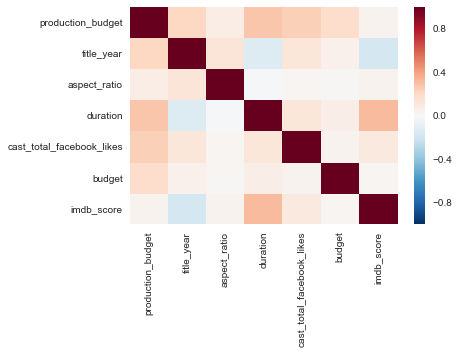

In [3]:
import seaborn as sns
%matplotlib inline 

sns.heatmap(X.corr())

### C-La maldición de la dimensión

- Datasaurus Dozen y Anscombe's quartet:  
Utilidad de la capacidad de entender los datos en 1, 2 y 3 dimensiones del ojo humano.


- Maldición de la dimensionalidad:  
En dimensión superior o igual a 4, la capacidad de entender los datos se pierde, y aún peor fenomenos extraños/contraproducentes ocurren
___

**Ejemplo 1**

Que largo debe tener cada arista de un hypercubo de dimension p que capture 10% del volumen de un hypercubo de volumen 1 que lo contiene?

![](img/hypercube.png)

$$V_{hypercubo}=a^p \text{ ,y si } V_{hypercubo}=0.1 ⟹ a=0.1^{1/p}$$

**Graficando la función anterior, encontrar la arista del 10% del hypercubo de 1...15**

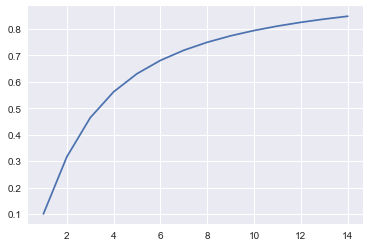

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,15)
y = np.power(0.1,1/x)
plt.plot(x,y)

>**En dimensión 10:** Necesitamos un hypercubo que cubra 80% de cada una de las aristas para solamente obtener 10% del volumen!

<div class='alert alert-success'>
En alta dimensión es muy poco probable que el datasets cubran todo el espacio de forma densa. 
Por ende en **alta dimensión se necesita una cantidad de datos que crece exponencialmente para poder entrenar los modelos**. 

## 2 Analisis y selección de Features

### A-Feedback del Model

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> Nota: Muchos de los modelos pueden dar feedback sobre "que tan buenas" estan diseñadas las featues, tales como la regresión o los arboles se dicen **"interpretables"**. Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o **"insights"**.

En particular la regresión Lasso es interpretable:

mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
la regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [6]:
X = pd.read_csv('datasets/X.csv')

y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [7]:
from sklearn.linear_model import Lasso
model = Lasso()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
len(X_train)/len(X)

0.75

In [10]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
model.score(X_test, y_test)

0.55261437927244805

In [12]:
model.coef_

array([  3.12819050e+00,  -1.67478986e+05,  -8.00564252e+06,
        -1.21309135e+05,   2.77813082e+02,  -1.04867172e-02,
         2.76739878e+07])

In [13]:
var = np.floor(np.log10(np.abs(model.coef_)))

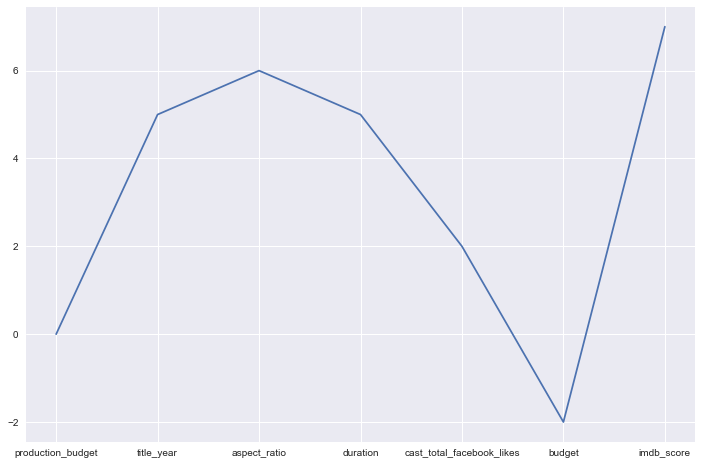

In [14]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

Esto nos guía a guardar únicamente:

- imdb_score
- aspect_ratio
- title_year
- duration
- cast_total_facebook_likes
- production_budget

### B-Selección a través de Técnicas de visualización

Correlación entre Variables

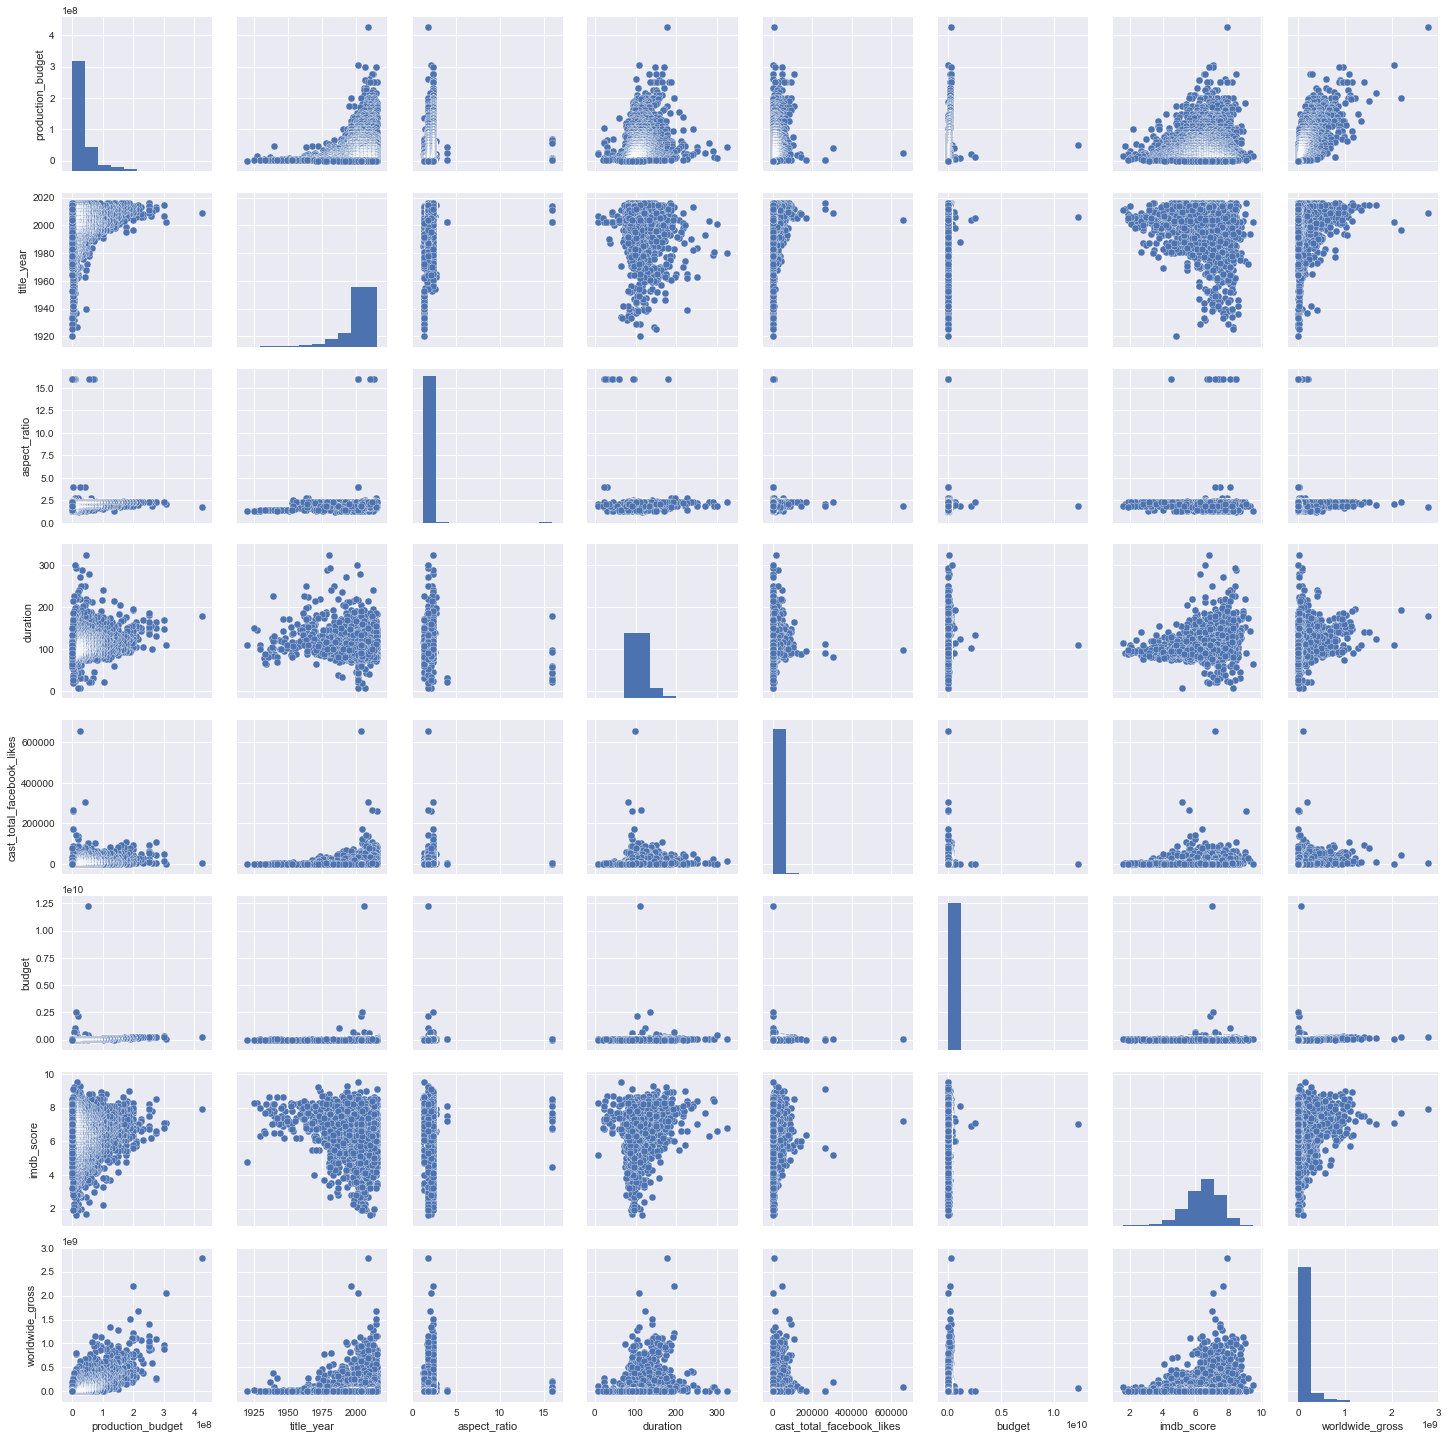

In [17]:
import seaborn as sns

Z = pd.concat([X,y],axis=1)
sns.pairplot(Z)

In [18]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 = pd.concat([X,clase],axis=1)

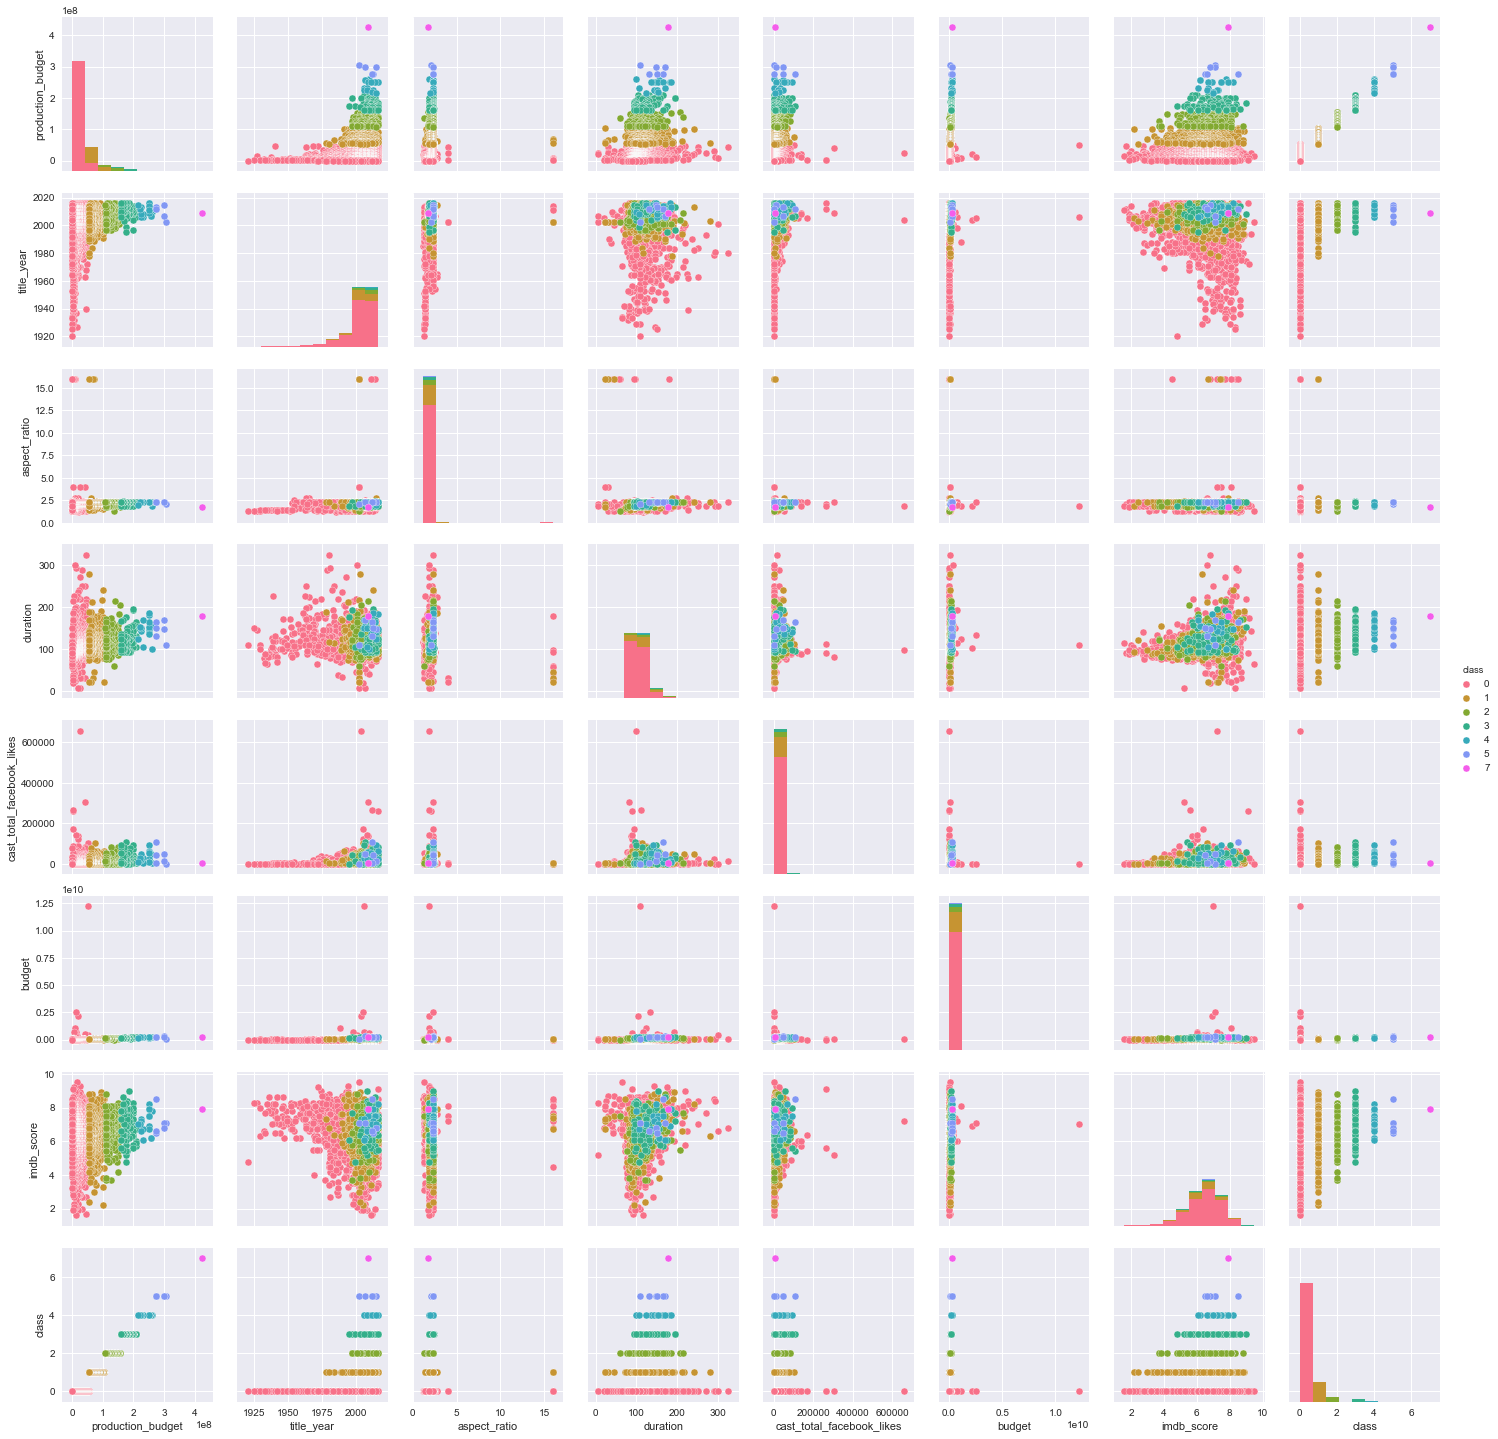

In [19]:
sns.pairplot(Z2,hue='class')

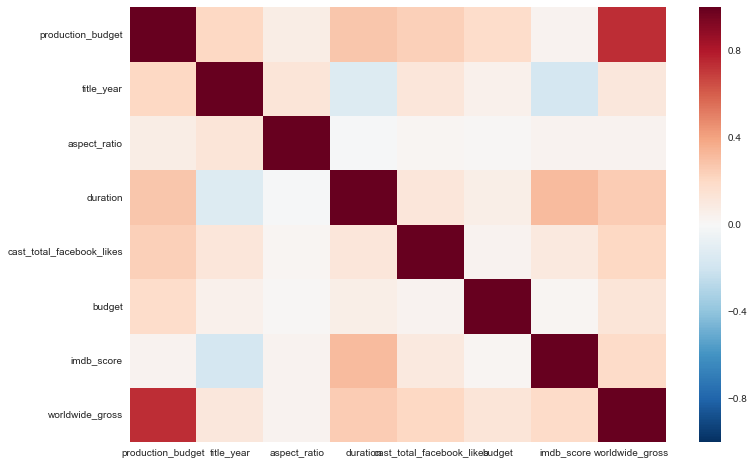

In [20]:
Z3 = pd.concat([X,y],axis=1)
sns.heatmap(Z3.corr())

### C-Metodos de selección automatica de features

<div class='alert alert-info'>
Sklearn posee una serie de métodos para seleccionar las mejores features **sklearn.feature_selection**
</div>

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression #PAra clasificación es mejor chia

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
      score_func=<function mutual_info_regression at 0x7f2cf3990378>)

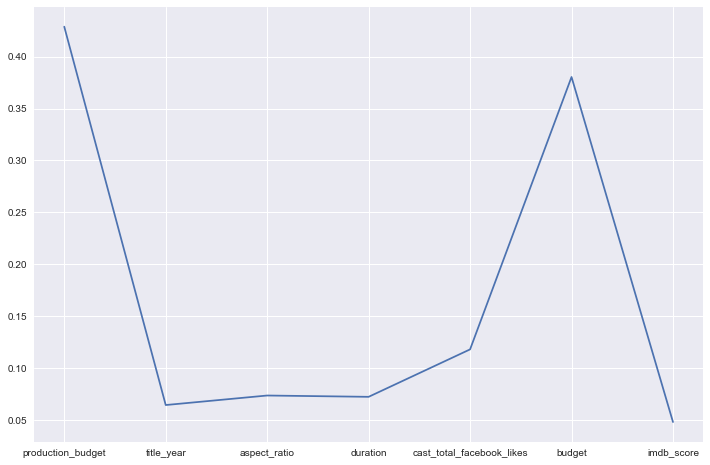

In [22]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));

Del analisis univariante obtenemos que las mejores features son:

- production_budget
- cast_total_facebook_likes
- budget

### D-Veamos los resultados del modelo con estas features

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
cols2 = ['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [27]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

/home/henry/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.53184075895
0.531963608026
0.531625152015
